In [42]:
import pandas as pd
df = pd.read_csv(r'C:\Users\bilobrkv\Downloads\C\Users\bilobrkv\Desktop\TINA -CC-DA\Portfolio\Paygab by industry.csv')

columns_to_drop = [
    'STRUCTURE', 'STRUCTURE_ID', 'STRUCTURE_NAME',
    'Time frequency', 'Unit of measure',
    'nace_r2',
    'Geopolitical entity (reporting)', 'Time', 'Observation value',
    'Observation status (Flag) V2 structure', 'Confidentiality status (flag)'
]

df_cleaned = df.drop(columns=columns_to_drop)

df = df.rename(columns={
    'Statistical classification of economic activities in the European Community (NACE Rev. 2)': 'industry'
})
industry_gap = df.groupby('industry')['OBS_VALUE'].mean().sort_values(ascending=False)

industry_gap.head(15)

industry
Financial and insurance activities                                                                                                   28.075957
Wholesale and retail trade; repair of motor vehicles and motorcycles                                                                 20.387185
Information and communication                                                                                                        19.160510
Manufacturing                                                                                                                        19.135532
Professional, scientific and technical activities                                                                                    18.666958
Human health and social work activities                                                                                              18.530189
Arts, entertainment and recreation                                                                                                   

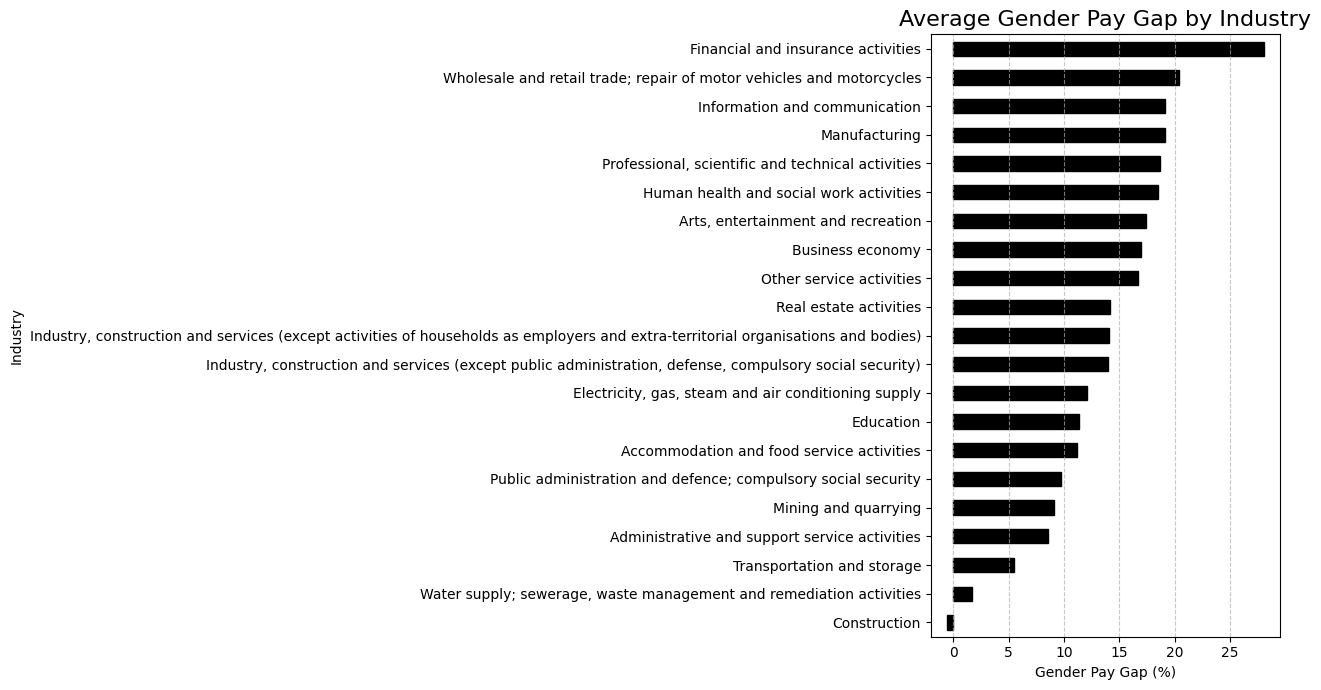

In [23]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv(r'C:\Users\bilobrkv\Downloads\C\Users\bilobrkv\Desktop\TINA -CC-DA\Portfolio\Paygab by industry.csv')

columns_to_drop = [
    'STRUCTURE', 'STRUCTURE_ID', 'STRUCTURE_NAME',
    'Time frequency', 'Unit of measure',
    'nace_r2',
    'Geopolitical entity (reporting)', 'Time', 'Observation value',
    'Observation status (Flag) V2 structure', 'Confidentiality status (flag)'
]

df_cleaned = df.drop(columns=columns_to_drop)

df = df.rename(columns={
    'Statistical classification of economic activities in the European Community (NACE Rev. 2)': 'industry' , 
    'Industry, construction and services (except activities of households as employers and extra-territorial organisations and bodies)':'Industry, construction and services (except activities of households ect'
})

industry_gap = df.groupby('industry')['OBS_VALUE'].mean().sort_values(ascending=False)

df = pd.DataFrame(industry_gap)

# Group by industry (if needed) and sort by pay gap
industry_avg_gap = df.groupby('industry')['OBS_VALUE'].mean().sort_values(ascending=True)

# Plot
plt.figure(figsize=(13, 7))
industry_avg_gap.plot(kind='barh', color='black', edgecolor='black')
plt.title('Average Gender Pay Gap by Industry', fontsize=16)
plt.xlabel('Gender Pay Gap (%)')
plt.ylabel('Industry')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

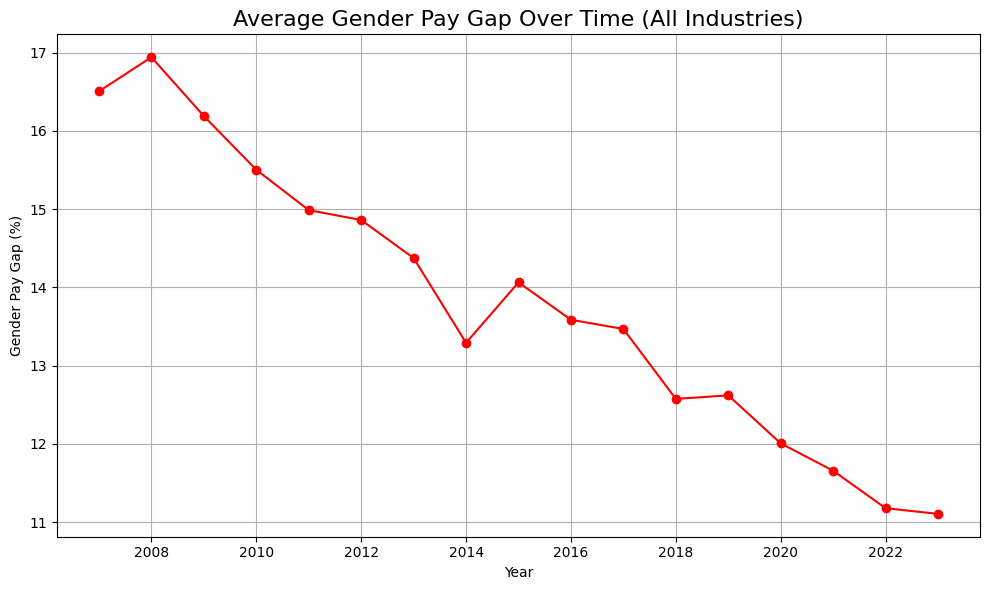

In [27]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv(r'C:\Users\bilobrkv\Downloads\C\Users\bilobrkv\Desktop\TINA -CC-DA\Portfolio\Paygab by industry.csv')

df = df.rename(columns={
    'Statistical classification of economic activities in the European Community (NACE Rev. 2)': 'industry'})

df = df.rename(columns={'Geopolitical entity (reporting)' : 'Country'})

industry_gap = df.groupby('industry')['OBS_VALUE'].mean().sort_values(ascending=False)

yearly_gap = df.groupby('TIME_PERIOD')['OBS_VALUE'].mean()

# Plot
plt.figure(figsize=(10, 6))
yearly_gap.plot(kind='line', marker='o', color='red')
plt.title('Average Gender Pay Gap Over Time (All Industries)', fontsize=16)
plt.xlabel('Year')
plt.ylabel('Gender Pay Gap (%)')
plt.grid(True)
plt.tight_layout()
plt.show()

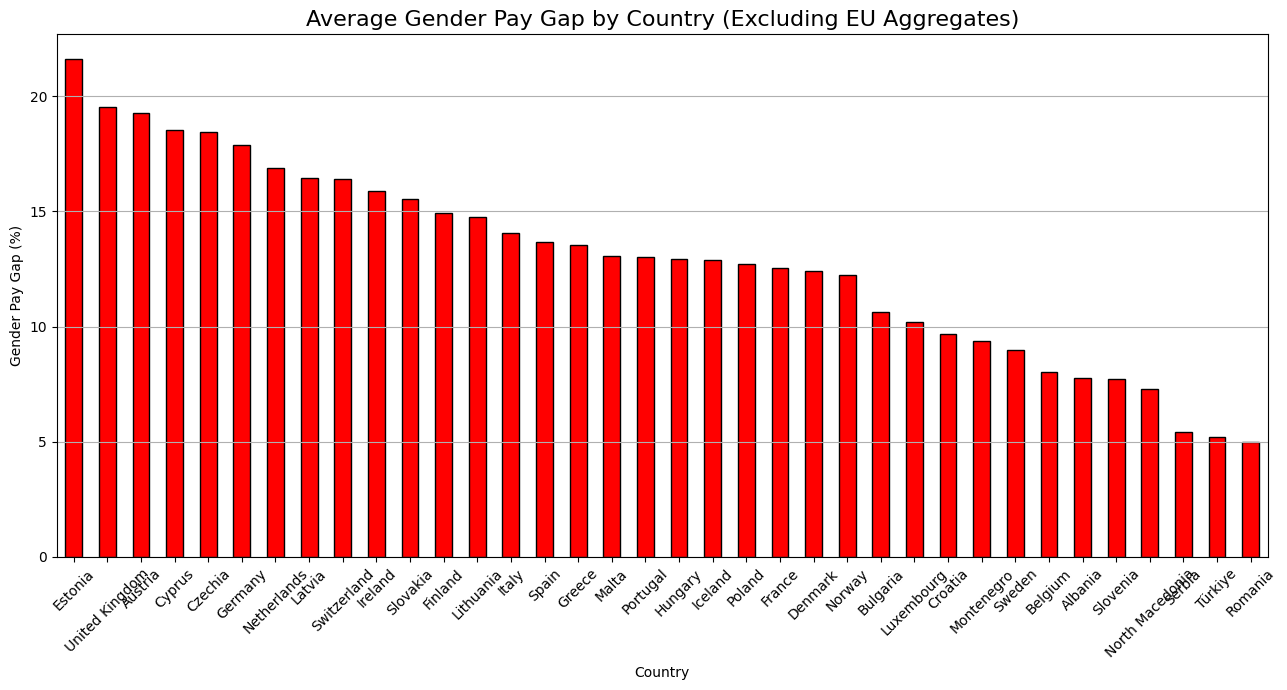

In [34]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv(r'C:\Users\bilobrkv\Downloads\C\Users\bilobrkv\Desktop\TINA -CC-DA\Portfolio\Paygab by industry.csv')

df = df.rename(columns={
    'Statistical classification of economic activities in the European Community (NACE Rev. 2)': 'industry'})

df = df.rename(columns={'Geopolitical entity (reporting)' : 'Country'})

country_gap = df.groupby('Country')['OBS_VALUE'].mean().sort_values(ascending=False)

# Plot the updated chart
plt.figure(figsize=(13, 7))
country_gap.plot(kind='bar', color='red', edgecolor='black')
plt.title('Average Gender Pay Gap by Country (Excluding EU Aggregates)', fontsize=16)
plt.xlabel('Country')
plt.ylabel('Gender Pay Gap (%)')
plt.xticks(rotation=45)
plt.grid(True, axis='y')
plt.tight_layout()
plt.show()


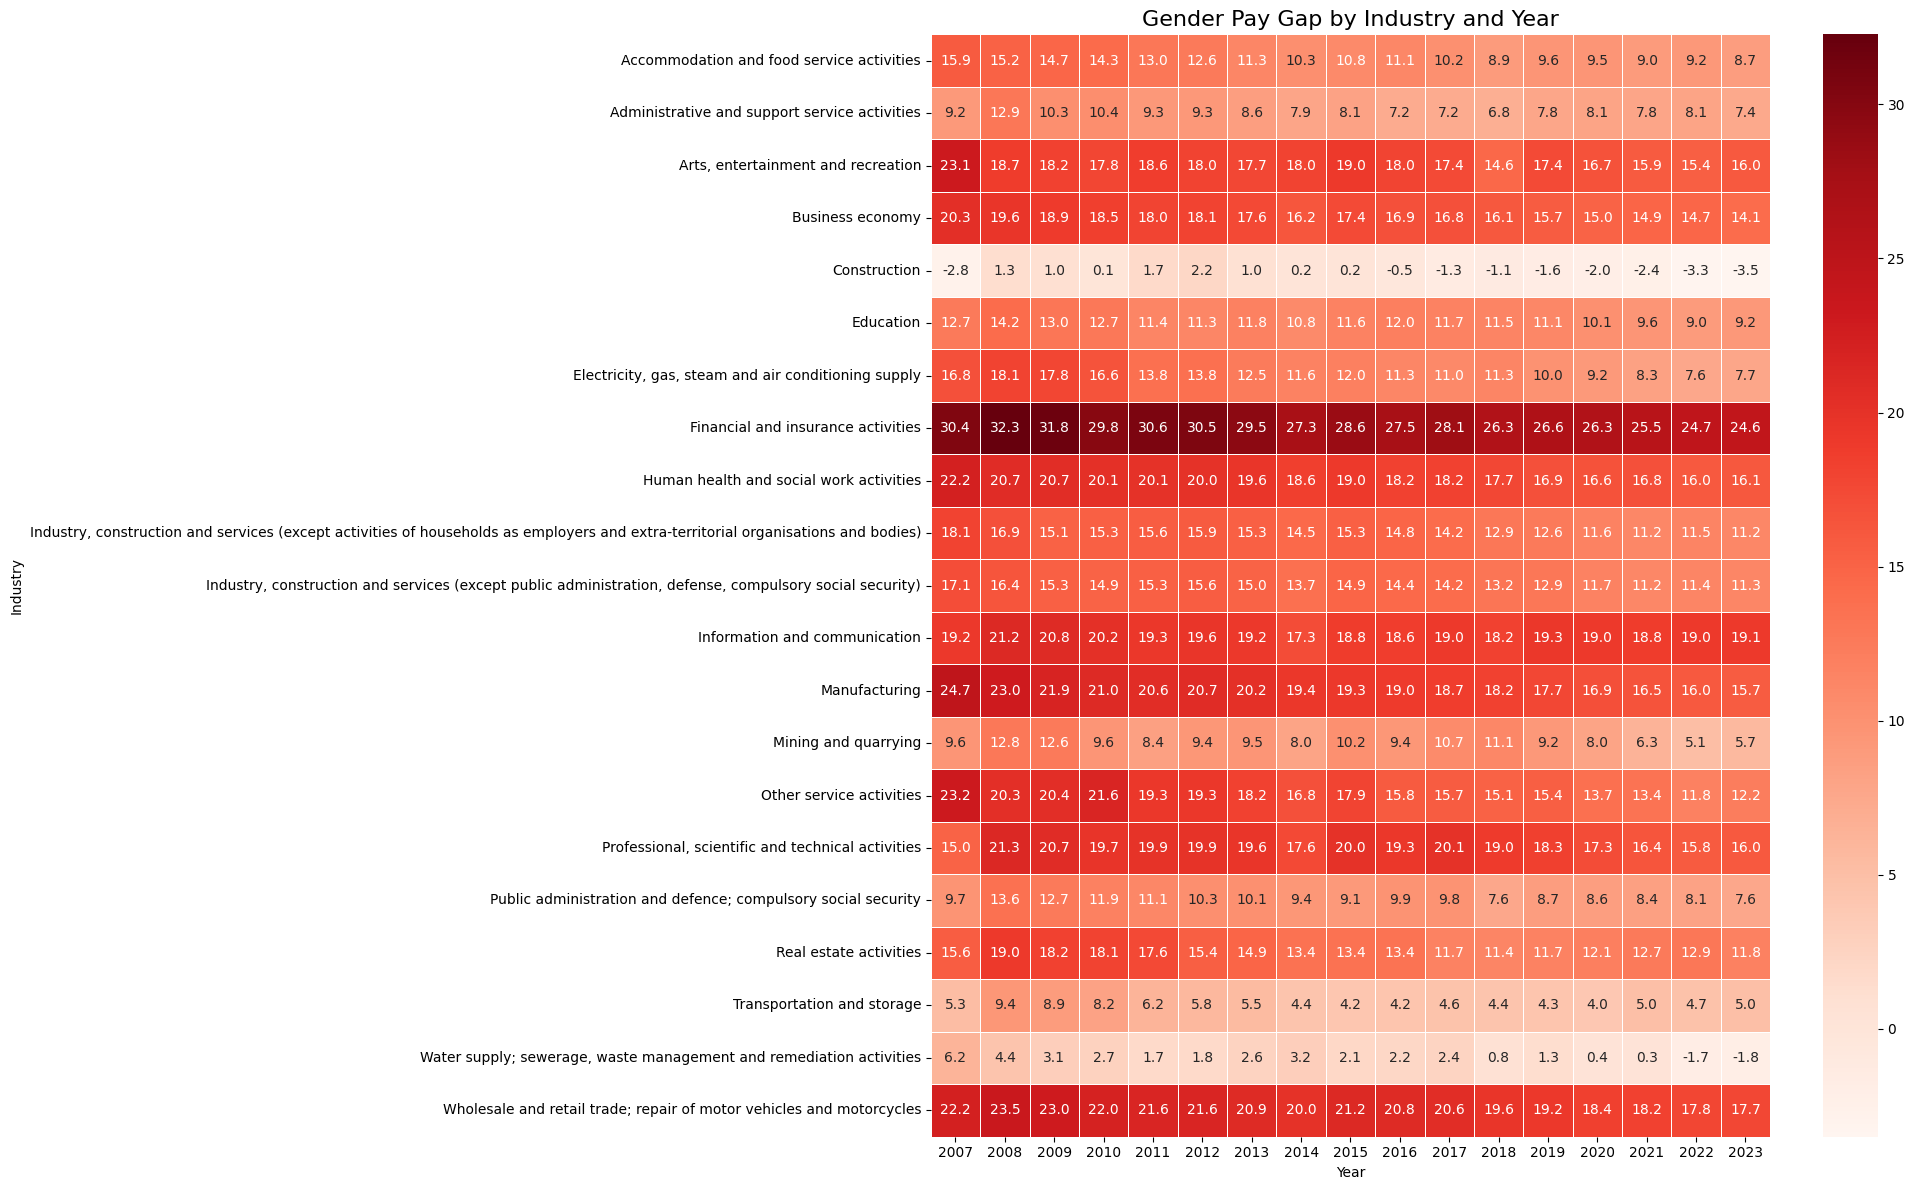

In [26]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv(r'C:\Users\bilobrkv\Downloads\C\Users\bilobrkv\Desktop\TINA -CC-DA\Portfolio\Paygab by industry.csv')

columns_to_drop = [
    'STRUCTURE', 'STRUCTURE_ID', 'STRUCTURE_NAME',
    'Time frequency', 'Unit of measure',
    'nace_r2',
    'Geopolitical entity (reporting)', 'Time', 'Observation value',
    'Observation status (Flag) V2 structure', 'Confidentiality status (flag)']

df_cleaned = df.drop(columns=columns_to_drop)

df = df.rename(columns={
    'Statistical classification of economic activities in the European Community (NACE Rev. 2)': 'industry'})

df = df.rename(columns={'Geopolitical entity (reporting)' : 'Country'})

df_filtered = df[~df['geo'].isin(['EU27_2020', 'EU28'])]

country_gap = df_filtered.groupby('Country')['OBS_VALUE'].mean().sort_values(ascending=False)

pivot_table = df.pivot_table(values='OBS_VALUE', index='industry', columns='TIME_PERIOD', aggfunc='mean')

# Plot heatmap
import seaborn as sns
plt.figure(figsize=(20, 12))
sns.heatmap(pivot_table, annot=True, cmap='Reds', fmt='.1f', linewidths=.5)
plt.title('Gender Pay Gap by Industry and Year', fontsize=16)
plt.xlabel('Year')
plt.ylabel('Industry')
plt.tight_layout()
plt.show()

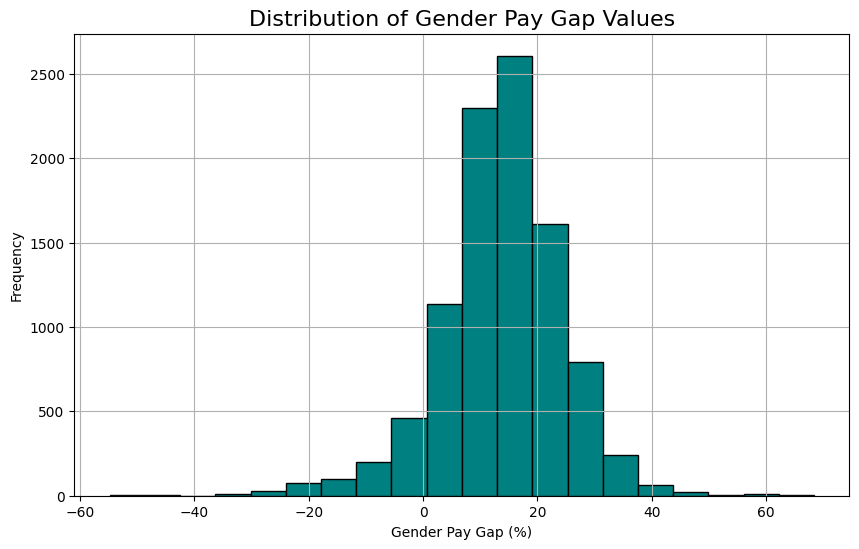

In [37]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv(r'C:\Users\bilobrkv\Downloads\C\Users\bilobrkv\Desktop\TINA -CC-DA\Portfolio\Paygab by industry.csv')

columns_to_drop = [
    'STRUCTURE', 'STRUCTURE_ID', 'STRUCTURE_NAME',
    'Time frequency', 'Unit of measure',
    'nace_r2',
    'Geopolitical entity (reporting)', 'Time', 'Observation value',
    'Observation status (Flag) V2 structure', 'Confidentiality status (flag)']

df_cleaned = df.drop(columns=columns_to_drop)

df = df.rename(columns={
    'Statistical classification of economic activities in the European Community (NACE Rev. 2)': 'industry'})

df = df.rename(columns={'Geopolitical entity (reporting)' : 'Country'})

df_filtered = df[~df['geo'].isin(['EU27_2020', 'EU28'])]

plt.figure(figsize=(10, 6))
df['OBS_VALUE'].dropna().hist(bins=20, color='teal', edgecolor='black')
plt.title('Distribution of Gender Pay Gap Values', fontsize=16)
plt.xlabel('Gender Pay Gap (%)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

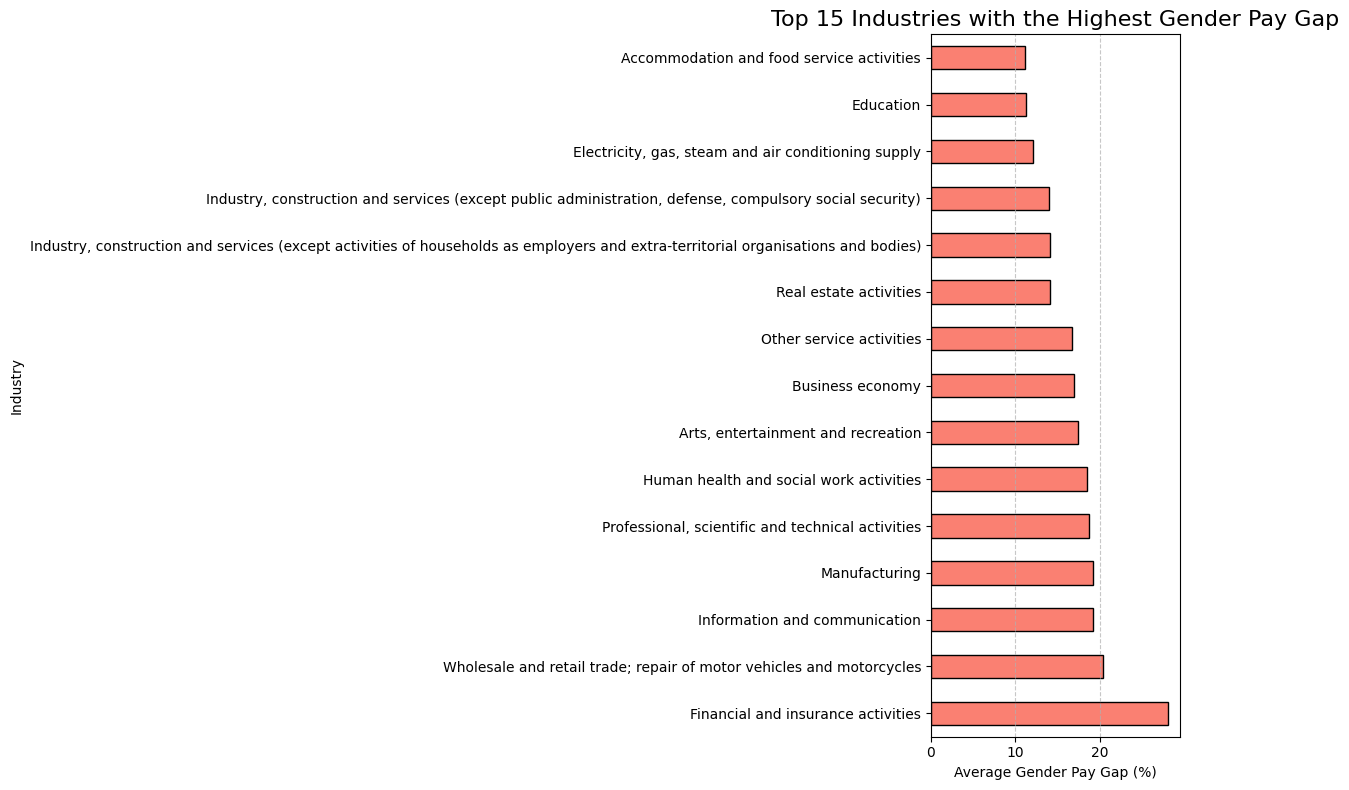

In [35]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv(r'C:\Users\bilobrkv\Downloads\C\Users\bilobrkv\Desktop\TINA -CC-DA\Portfolio\Paygab by industry.csv')

df = df.rename(columns={
    'Statistical classification of economic activities in the European Community (NACE Rev. 2)': 'industry'})

df = df.rename(columns={'Geopolitical entity (reporting)' : 'Country'})

import matplotlib.pyplot as plt

# Plot the top 15 industries with the highest gender pay gap
plt.figure(figsize=(12, 8))
industry_gap.head(15).plot(kind='barh', color='salmon', edgecolor='black')
plt.title('Top 15 Industries with the Highest Gender Pay Gap', fontsize=16)
plt.xlabel('Average Gender Pay Gap (%)')
plt.ylabel('Industry')
plt.grid(True, axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()